In [2]:
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings("ignore", category=UserWarning)

In [3]:
import pandas as pd
import numpy as np
import re

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Window 의 한글 폰트 설정
plt.rc('font', family='Malgun Gothic')

In [8]:
# 상가업소정보 2018년 6월 데이터
shop_2019 = pd.read_csv('../data/commercial_store/소상공인시장진흥공단_상가업소정보_201906_01.csv')
shop_2019.shape

(565016, 39)

In [9]:
coffee = shop_2019[shop_2019['상권업종소분류명']=='커피전문점/카페/다방']

In [10]:
coffee.columns

Index(['상가업소번호', '상호명', '지점명', '상권업종대분류코드', '상권업종대분류명', '상권업종중분류코드',
       '상권업종중분류명', '상권업종소분류코드', '상권업종소분류명', '표준산업분류코드', '표준산업분류명', '시도코드',
       '시도명', '시군구코드', '시군구명', '행정동코드', '행정동명', '법정동코드', '법정동명', '지번코드',
       '대지구분코드', '대지구분명', '지번본번지', '지번부번지', '지번주소', '도로명코드', '도로명', '건물본번지',
       '건물부번지', '건물관리번호', '건물명', '도로명주소', '구우편번호', '신우편번호', '동정보', '층정보',
       '호정보', '경도', '위도'],
      dtype='object')

In [11]:
coffee['상호명'].unique().shape

(15205,)

In [12]:
coffee['상호명'].value_counts()

간단하지만특별한화피디Cafe    1477
이디야커피               538
스타벅스                370
투썸플레이스              165
커피빈                 153
엔제리너스               134
할리스커피               124
카페베네                110
탐앤탐스                109
커피베이                104
공차                   99
쥬씨                   93
빽다방                  92
커피에반하다               76
요거프레소                69
파스쿠찌                 69
커피나무                 58
토프레소                 56
컴포즈커피                52
쥬스식스                 52
커피하우스                46
더카페                  45
커피마마                 45
더벤티                  43
메가커피                 42
설빙                   39
할리스                  35
셀렉토커피                33
커피니                  30
마리웨일237              28
                   ... 
요거프레소길음뉴타운점           1
세명                    1
코벳블랑                  1
알레스벤                  1
8.15                  1
비갠후                   1
카페그림                  1
남산스퀘어약국               1
커피앤베이커리               1
보그너커피상도동점             1
별별다방            

In [13]:
coffee.loc[coffee['상호명'].str.contains('스타벅스'),'상호명'].unique()

array(['스타벅스', '스타벅스종로3가점', '스타벅스커피여의도IFC1F', '스타벅스신림사거리점', '스타벅스커피홍대역',
       '스타벅스새문안로점', '스타벅스올림픽평화의문점', '스타벅스연신내역', '스타벅스연세백양로점',
       '스타벅스가락시장역점', '스타벅스외대점', '스타벅스석촌역', '스타벅스명지대점', '스타벅스압구정로데오역',
       '스타벅스연대동문', '스타벅스강남삼성타운점', '스타벅스사당점', '스타벅스신림점', '스타벅스서울대입구역점',
       '스타벅스광장점', '스타벅스신촌명물거리점', '스타벅스명동미래', '스타벅스건국클래식점', '스타벅스연희DT점',
       '스타벅스삼선교점', '스타벅스종각점', '스타벅스올림픽공원북문점', '스타벅스커피여의도호성', '스타벅스충정타워',
       '스타벅스방배카페입구', '스타벅스이수역점', '스타벅스W-MALL점', '스타벅스용산역점', '스타벅스마포일진빌딩점',
       '스타벅스천호로데오점', '스타벅스중계역점', '스타벅스명동메트로', '스타벅스마포아크로타워점',
       '스타벅스남부터미널2점', '스타벅스구로디지털로점', '스타벅스중랑구청점', '스타벅스종로관수점', '스타벅스논현힐탑',
       '스타벅스부산서면', '스타벅스삼성도심공항점', '스타벅스종로2가점', '스타벅스선정릉역점', '스타벅스선릉로점',
       '스타벅스명동역', '스타벅스미아역점', '스타벅스역삼럭키', '스타벅스커피신도림디큐브시티B2',
       '스타벅스이태원거리점', '스타벅스구로에이스트윈타워1점', '스타벅스을지로입구', '스타벅스교대역점',
       '스타벅스서울중앙우체국점', '스타벅스구로하이엔드점', '스타벅스남산스테이트', '스타벅스목동점', '스타벅스삼성교점',
       '스타벅스조선호텔후문', '스타벅스명일이마트점', '스타벅스커리학동사거리점', '스타벅스서울교대점',
       '스타벅스강북구청사거리점', '스타벅스청

In [18]:
coffee[coffee['상호명']=='간단하지만특별한화피티Cafe']

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도


In [15]:
coffee['시도명'].isnull().sum()

0

In [28]:
df_seoul = shop_2019.loc[shop_2019['시도명'].str.startswith('서울')]
df_seoul.shape

(401071, 39)

In [30]:
df_seoul['상권업종대분류명'].value_counts()

음식          131687
소매          124782
생활서비스        64344
학문/교육        31247
의료           18826
부동산          15430
관광/여가/오락     11578
숙박            3047
스포츠            130
Name: 상권업종대분류명, dtype: int64

In [31]:
df_seoul[['위도','경도']].describe(include=np.number)

,위도,경도
count,401071.000000,401071.000000
mean,37.544965,126.996983
std,0.048108,0.080574
min,37.434081,126.768169
25%,37.505431,126.928061
50%,37.541162,127.012732
75%,37.571921,127.057331
max,37.692398,127.182588


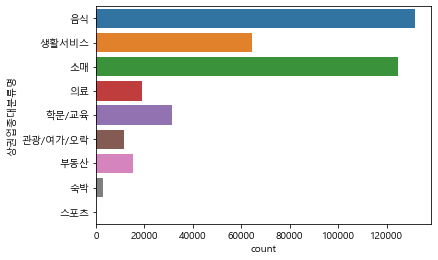

In [32]:
sns.countplot(data=df_seoul, y="상권업종대분류명")

In [34]:
df_food=df_seoul.loc[df_seoul['상권업종대분류명'].str.contains('음식')]
df_food.shape

(131687, 39)

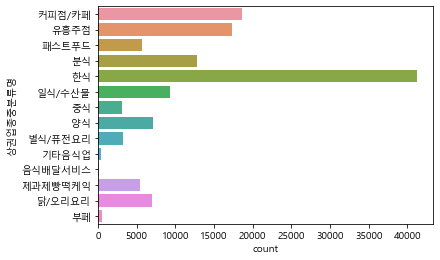

In [35]:
sns.countplot(data=df_food, y="상권업종중분류명")

## 퀴즈
#### '상권업종중분류명'이 '패스트푸드'인 데이타프레임 df_fast_food을 정의하여라
#### '상권업종중분류명'이 '패스트푸드'인 데이타프레임의 상호명은 모두 몇개인가?
#### '상권업종중분류명'이 '패스트푸드'인 데이타프레임에서 가장 많은 상호명은?
#### 서울에 있는 '피자'가 포함된 상호명 목록을 출력하여라
#### 서울강남구에 있는 도미노피자의 지점명을 모두 출력하여라

In [40]:
df_fast_food = df_food.loc[df_food['상권업종중분류명']=='패스트푸드']
df_fast_food.shape

(5683, 39)

In [43]:
df_food.columns

Index(['상가업소번호', '상호명', '지점명', '상권업종대분류코드', '상권업종대분류명', '상권업종중분류코드',
       '상권업종중분류명', '상권업종소분류코드', '상권업종소분류명', '표준산업분류코드', '표준산업분류명', '시도코드',
       '시도명', '시군구코드', '시군구명', '행정동코드', '행정동명', '법정동코드', '법정동명', '지번코드',
       '대지구분코드', '대지구분명', '지번본번지', '지번부번지', '지번주소', '도로명코드', '도로명', '건물본번지',
       '건물부번지', '건물관리번호', '건물명', '도로명주소', '구우편번호', '신우편번호', '동정보', '층정보',
       '호정보', '경도', '위도'],
      dtype='object')

In [44]:
df_fast_food['상호명'].value_counts()

배스킨라빈스31          131
피자스쿨              120
던킨도너츠             111
한솥도시락              90
롯데리아               87
한솥                 81
베스킨라빈스             72
이삭토스트              70
버거킹                66
피자마루               64
도미노피자              64
맥도날드               59
59피자               59
배스킨라빈스             58
피자헛                56
본도시락               46
미스터피자              44
파파존스피자             37
피자나라치킨공주           35
봉구스밥버거             33
써브웨이               31
요거프레소              30
피자알볼로              30
명랑핫도그              25
맘스터치               24
명랑시대쌀핫도그           24
임실치즈피자             20
서브웨이               20
크라제버거              20
석봉토스트              19
                 ... 
비비큐어린이대공원스          1
명랑핫도그신대방1동점         1
치즈테라왕십리센트라스점        1
파이어벨                1
쏭스핫도그한양대점           1
피자앤와인매리드            1
BrosBurger          1
맥도날드구산점             1
마피아                 1
임실피자치킨              1
KFC용산아이파크몰          1
베스킨라빈스동대문           1
한국맥도날드미아DT점         1
고고올스타핫도그            1
삐노누아      

In [46]:
df_seoul.loc[df_seoul['상호명'].str.contains('피자'),'상호명'].shape

(1857,)

In [42]:
df_fast_food.loc[df_fast_food['상호명'].str.contains('피자'),'상호명'].unique()

array(['피자마루', '솔로몬피자', '시장피자', '피자', '59피자', '도미노피자오금점', '피자스쿨', '피자에땅',
       '명품피자치킨', '피자헛', '도미노피자이문점', '피자클럽킴스', '피자스쿨장승배기', '도미노피자',
       '대장장이화덕피자', '피자글릭', '피자스쿨망우우림시장점', '카니발피자', '아이피자', '미스터피자신림녹두점',
       '빨간모자피자가좌점', '피자알볼로오류점', '미스터피자', '토니피자치킨족발', '빈스피자', '이태리피자',
       '빅마켓피자코트', '피자포유', '피자26', '디에이피자', '피자스쿨신월1호점', '피자굿망우우림점',
       '빨간고추피자', '피자알볼로옥수점', '코스트피자', '피자헛홍대본점', '밀라노피자', '모이또피자',
       '한국피자헛한티역', '제임스시카고피자', '영구스피자', '7번가피자', '한명숙피자펍', '피자샵',
       '빨간모자피자', '피자데이치킨데이', '조아피자', '왕서방피자', '피니치니피자', '수드피자',
       '우리집피자,돈치킨', '폴피자', '임실치즈피자', '피자스쿨본사', '피자세계', '피자나라치킨공주',
       '뽕뜨락피자', '명품임실치즈피자', '뽕뜨락피자점구로1점', '피자토비', '피자헛약수점', '리버티스피자',
       '명품임실피자', '피자스쿨송파1호점', '피자스쿨풍납점', '피자알볼로', '피자바람', '피자일일구', '수피자',
       '피자헤븐', '피자몰', '조선피자', '피자애', '한스피자', '강정구의피자생각', '피자스쿨당산점',
       '계동피자', '이랜드크루즈피자몰노들', '논스톱피자치킨', '피자투어', '빨간모자피자명일점', '피자굼터',
       '강정구의피자생각광진점', '피자토랑', '피자헛중계점', '피자마루국사봉점', '점보피자', '피자스쿨도화점',
       '지정환임실치즈피자', '수타짱임실치즈피자'

In [49]:
df_seoul[(df_seoul['시군구명']=='강남구')&(df_seoul['지점명'].str.contains('도미노피자'),'지점명')].unique()

ValueError: operands could not be broadcast together with shapes (401071,) (2,) 

## 배스킨라빈스와 던킨도너츠 입지 분석

In [53]:
df_31 = df_seoul[df_seoul['상호명'].str.contains('배스킨|베스킨|던킨')].copy()
df_31.shape

(651, 39)

In [55]:
df_31 = df_31[['상호명','지점명','상권업종대분류명','상권업종중분류명',
               '상권업종소분류명','지번주소','도로명주소',
               '경도','위도','시군구명','행정동명']]
df_31.shape

(651, 11)

In [56]:
df_31['상호명'].value_counts()

배스킨라빈스31             131
던킨도너츠                117
베스킨라빈스                77
배스킨라빈스                62
던킨도넛                   5
비알코리아베스킨라빈스            2
베스킨라빈스아이스크림            2
베스킨라빈스31아이스크림          2
배스킨라빈스31불광역점           1
배스킨라빈스31중랑구청점          1
던킨도너츠르네상스점             1
배스킨라빈스31방학역점           1
배스킨라빈스31신월신곡점          1
배스킨라빈스31CAFE31신촌점      1
배스킨라빈스31면목역점           1
배스킨라빈스31명일역점           1
배스킨라빈스31영등포구청점         1
배스킨라빈스31청량리역사점         1
배스킨라빈스31중랑역점           1
베스킨라빈스미아역점             1
던킨도너츠신금호역점             1
에이엠플러스자산개발베스킨라빈스       1
배스킨라빈스31성내역점           1
던킨도너츠용산민자역사2호          1
배스킨라빈스31응암점            1
배스킨라빈스31개봉푸르지오점        1
배스킨라빈스31개봉중앙점          1
배스킨라빈스목동로데오            1
배스킨라빈스31CAFE31이대       1
배스킨라빈스브라운청담점           1
                    ... 
배스킨라빈스31성동금호점          1
던킨&아트샵                 1
배스킨라빈스31대치2호점          1
던킨도너츠압구정소망             1
국제흥업개발던킨도너츠용산센트럴점      1
배스킨라빈스31신정네거리점         1
배스킨라빈스31도화점            1
배스킨라빈스31구로고척점          1
베스킨라빈슨                 1


In [58]:
df_31['브랜드명']=''

In [59]:
df_31[['상호명','브랜드명']].head()

,상호명,브랜드명
110,배스킨라빈스,
1098,던킨도너츠,
1838,던킨도너츠테크노마트점,
2145,베스킨라빈스,
2281,던킨도너츠창동하나로,


In [63]:
df_31.loc[df_31['상호명'].str.contains('배스킨|베스킨'),'브랜드명']='배스킨라빈스'
df_31.loc[df_31['상호명'].str.contains('던킨'),'브랜드명']='던킨도너츠'

In [64]:
df_31[['상호명','브랜드명']].head()

,상호명,브랜드명
110,배스킨라빈스,배스킨라빈스
1098,던킨도너츠,던킨도너츠
1838,던킨도너츠테크노마트점,던킨도너츠
2145,베스킨라빈스,배스킨라빈스
2281,던킨도너츠창동하나로,던킨도너츠


In [66]:
df_31_group_count = df_31['브랜드명'].value_counts()
df_31_group_count

배스킨라빈스    462
던킨도너츠     189
Name: 브랜드명, dtype: int64

In [70]:
df_31_ratio = df_31_group_count[0]/df_31_group_count[1]
print('제공된 데이터로 봤을 때 서울에는 던킨도너츠보다 배스킨라빈스 매장이 \
{0:.2f}배 가량 많습니다.'.format(df_31_ratio))

제공된 데이터로 봤을 때 서울에는 던킨도너츠보다 배스킨라빈스 매장이 2.44배 가량 많습니다.


In [71]:
df_31.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 651 entries, 110 to 558398
Data columns (total 12 columns):
상호명         651 non-null object
지점명         496 non-null object
상권업종대분류명    651 non-null object
상권업종중분류명    651 non-null object
상권업종소분류명    651 non-null object
지번주소        651 non-null object
도로명주소       651 non-null object
경도          651 non-null float64
위도          651 non-null float64
시군구명        651 non-null object
행정동명        651 non-null object
브랜드명        651 non-null object
dtypes: float64(2), object(10)
memory usage: 66.1+ KB


In [72]:
df_31['위도'] = df_31['위도'].astype(float)
df_31['경도'] = df_31['경도'].astype(float)

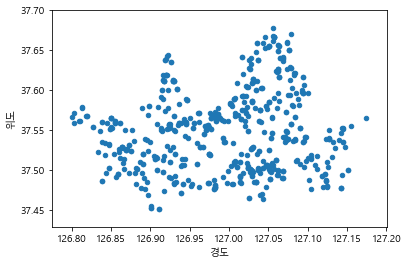

In [73]:
# pandas로 scatter plot 그리기
df_31.plot.scatter(x='경도',y='위도')

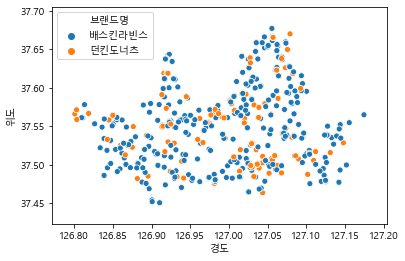

In [74]:
# seaborn으로 scatter plot 그리기
sns.scatterplot(data=df_31, x='경도',y='위도',hue="브랜드명")

In [ ]:
# folium.Map?

In [80]:
import folium

In [81]:
geo_df = df_31.copy()

# 지도를 초기화해줄때 어디를 중심으로 보여줄지 설정
# 우리가 가져온 데이터프레임 안에 있는 데이터를 기준으로 출력할 수 있도로 위경도
map = folium.Map(location=[geo_df['위도'].mean(),geo_df['경도'].mean()],
                            zoom_start=12)

for n in geo_df.index:
    # 팝업에 들어갈 텍스트를 지정
    popup_name = geo_df.loc[n,'브랜드명']+' - '+geo_df.loc[n,'도로명주소']
    # 브랜드명에 따라 아이콘 색상을 달리해서 찍어준다.
    if geo_df['브랜드명'][n] == '던킨도너츠':
        icon_color = 'pink'
    else:
        icon_color = 'blue'
    
    folium.Marker([geo_df.loc[n,'위도'],geo_df.loc[n,'경도']],
                 popup=popup_name,
    icon=folium.Icon(color=icon_color)).add_to(map)
    
map

In [89]:
geo_df = df_31.copy()
 
map = folium.Map(location=[geo_df['위도'].mean(),geo_df['경도'].mean()],
                            zoom_start=12,
                            tiles='Stamen Toner')

for n in geo_df.index:
    # 팝업에 들어갈 텍스트를 지정
    popup_name = geo_df.loc[n,'브랜드명']+' - '+geo_df.loc[n,'도로명주소']
    # 브랜드명에 따라 아이콘 색상을 달리해서 찍어준다.
    if geo_df['브랜드명'][n] == '던킨도너츠':
        icon_color = 'red'
    else:
        icon_color = 'blue'
    
    folium.CircleMarker(
        location =[geo_df['위도'][n],geo_df['경도'][n]],
        radius=3,
        popup=popup_name,
        fill=True,
        fill_color=icon_color).add_to(map)

map

In [90]:
df_bread = df_seoul.loc[
    df_seoul['상호명'].str.contains('뚜레쥬르|파리(바게|크라상)')
    &
    (~df_seoul['상호명'].str.contains('파스쿠찌|잠바주스'))
].copy()

df_bread.shape

(811, 39)

In [91]:
df_bread['상호명'].value_counts()

파리바게뜨               283
뚜레쥬르                177
파리크라상                23
씨제이뚜레쥬르               2
파리바게뜨까페               2
파리바게뜨카페대학로점           2
파리바게뜨성북점              2
회기역파리바게뜨              2
파리바게뜨월계미성             2
뚜레쥬르용마산역점             1
파리크라상강남리나스            1
뚜레쥬르독립문               1
파리바게뜨한강타운점            1
파리바게뜨강남을지병원점          1
파리바게트가산디지털            1
파리바게뜨가재울래미안점          1
파리바게뜨문정역점             1
뚜레쥬르종로구청점             1
파리크라상서초아크로비스          1
파리바게뜨장안현대점            1
뚜레쥬르개봉역점              1
파리바게트                 1
파리바게트역촌2호             1
파리바게뜨월곡두산점            1
뚜레쥬르건대스타시티점           1
파리바게뜨양평비즈타워           1
파리바게뜨송파레미안점           1
파리바게뜨강남구청센터점          1
뚜레쥬르시흥사거리점            1
뚜레쥬르카페대치점             1
                   ... 
파리바게뜨신림신원점            1
길음역파리바게뜨              1
파리바게뜨청량리점             1
파리크라상강남점              1
파리바게뜨종로세무서점           1
뚜레쥬르대림우성점             1
파리바게트17789위례아이파크      1
파리바게뜨마천점              1
파리바게뜨고덕래미안힐스I점        1
파리바게뜨강일리버파크점          1
파리바게뜨삼성삼익       

In [93]:
# pandas로 그리기
ax = df_tou[["경도","위도","브랜드명"]].plot.
    scatter(x='경도',y='위도',
           color='DarkGreen',label='뚜레쥬르')
df_paris[["경도","위도","브랜드명"]].plot.
    scatter(x='경도',y='위도',
           color='DarkBlue',label='파리바게뜨',
           ax=ax,grid=True)

SyntaxError: invalid syntax (<ipython-input-93-6f635caca244>, line 2)

In [94]:
df_seoul.loc[df_seoul['상호명'].str.contains('스타벅스|starbucks|STARBUCKS'),'상호명'].shape

(502,)

In [95]:
df_seoul.loc[df_seoul['상호명'].str.contains('이디야|ediya|EDIYA'),'상호명'].shape

(501,)

In [ ]:
df_cafe=df_seoul[df_seoul['상호명'].str.contains('스타벅스|starbucks|STARBUCKS'),'상호명']
df_cafe.shape

In [97]:
import json
geo_path='../data/seoul_municipalities_geo_simple.json'
geo_json=json.load(open(geo_path, encoding='utf-8'))
geo_json

{'type': 'FeatureCollection',
 'features': [{'type': 'Feature',
   'geometry': {'type': 'Polygon',
    'coordinates': [[[127.05181987399999, 37.685815952999974],
      [127.05195432999994, 37.68295554600002],
      [127.05124372099999, 37.68200315500002],
      [127.050936224, 37.68010014399999],
      [127.04973706099997, 37.676724165999985],
      [127.04887969799995, 37.67518859900002],
      [127.04820611399998, 37.67048413200001],
      [127.04893704599999, 37.667590002],
      [127.05142672199997, 37.663973570999985],
      [127.051469816, 37.66042898699999],
      [127.05343323299996, 37.65751023399997],
      [127.054073077, 37.654496732999974],
      [127.05376492699997, 37.652060053000014],
      [127.05396756200003, 37.650582568],
      [127.05545541100003, 37.64824690299997],
      [127.05584227600002, 37.64705617300001],
      [127.05566746900001, 37.64460474399999],
      [127.05516606799995, 37.643454948],
      [127.05513914699998, 37.64133787499998],
      [127.0547437